In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.tabular import *
from fastai.vision import *

# Rossmann

## Data preparation

People usually use RNN's for time series data, but in practice, on real world datsets don't tend to use RNNs but instead they take this time component and add a whole bunch of metadata(see the add_datepart function). Once you do this you can treat MANY(not all[for eg some complex kind of state invovled in a time series such as in equity trading]) time series problems as regular tabular problems.

To create the feature-engineered train_clean and test_clean from the Kaggle competition data, run `rossman_data_clean.ipynb`. One important step that deals with time series is this:

```python
add_datepart(train, "Date", drop=False)
add_datepart(test, "Date", drop=False)
```

In [5]:
path = Config().data_path()/'rossmann'
train_df = pd.read_pickle(path/'train_clean')

In [6]:
train_df.head().T

,0,1,2,3,4
index,0,1,2,3,4
Store,1,2,3,4,5
DayOfWeek,5,5,5,5,5
Date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
Sales,5263,6064,8314,13995,4822
Customers,555,625,821,1498,559
Open,1,1,1,1,1
Promo,1,1,1,1,1
StateHoliday,False,False,False,False,False
SchoolHoliday,1,1,1,1,1


In [7]:
n = len(train_df)
n

844338

### Experimenting with a sample

In [9]:
np.random.permutation(5)

array([4, 2, 3, 0, 1])

In [11]:
idx = np.random.permutation(range(n))[:2000]
idx.sort()
small_train_df = train_df.iloc[idx[:1000]]
small_test_df = train_df.iloc[idx[1000:]]
small_cat_vars = ["Store", "DayOfWeek", "PromoInterval"]
small_cont_vars = ['CompetitionDistance', 'Mean_Humidity']
small_train_df = small_train_df[small_cat_vars + small_cont_vars + ['Sales']]
small_test_df = small_test_df[small_cat_vars + small_cont_vars + ['Sales']]

In [12]:
small_train_df.head()

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales
392,394,5,NaN,10850.0,54,10549
595,597,5,"Mar,Jun,Sept,Dec",150.0,49,6990
1316,204,4,"Jan,Apr,Jul,Oct",5630.0,59,5997
1566,455,4,NaN,7660.0,60,9372
2061,951,4,"Jan,Apr,Jul,Oct",710.0,73,8117


In [13]:
small_test_df.head()

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales
418166,711,5,"Jan,Apr,Jul,Oct",17110.0,71,7306
418754,185,4,NaN,1860.0,58,7384
418905,336,4,NaN,190.0,55,15871
419722,40,3,"Feb,May,Aug,Nov",180.0,59,5185
419787,105,3,"Mar,Jun,Sept,Dec",6190.0,55,5239


### You can either use the procs parameter in TabularList when creating a tabular databunch  or you can call them seperately.

In [14]:
categorify = Categorify(small_cat_vars, small_cont_vars)
categorify(small_train_df)
categorify(small_test_df, test=True)

In [15]:
small_test_df.head()

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales
418166,NaN,5,"Jan,Apr,Jul,Oct",17110.0,71,7306
418754,185,4,NaN,1860.0,58,7384
418905,336,4,NaN,190.0,55,15871
419722,40,3,"Feb,May,Aug,Nov",180.0,59,5185
419787,NaN,3,"Mar,Jun,Sept,Dec",6190.0,55,5239


In [16]:
small_train_df.PromoInterval.cat.categories

Index(['Feb,May,Aug,Nov', 'Jan,Apr,Jul,Oct', 'Mar,Jun,Sept,Dec'], dtype='object')

In [17]:
small_train_df['PromoInterval'].cat.codes[:5]

392    -1
595     2
1316    1
1566   -1
2061    1
dtype: int8

In [18]:
fill_missing = FillMissing(small_cat_vars, small_cont_vars)
fill_missing(small_train_df)
fill_missing(small_test_df, test=True)

In [19]:
small_train_df[small_train_df['CompetitionDistance_na'] == True]

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales,CompetitionDistance_na
70736,879,1,"Feb,May,Aug,Nov",2570.0,69,4922,True
250092,291,3,NaN,2570.0,91,8023,True


## Preparing full data set

In [20]:
train_df = pd.read_pickle(path/'train_clean')
test_df = pd.read_pickle(path/'test_clean')

In [21]:
len(train_df), len(test_df)

(844338, 41088)

In [22]:
procs = [FillMissing, Categorify, Normalize]

In [23]:
cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen',
    'Promo2Weeks', 'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear',
    'State', 'Week', 'Events', 'Promo_fw', 'Promo_bw', 'StateHoliday_fw', 'StateHoliday_bw',
    'SchoolHoliday_fw', 'SchoolHoliday_bw']

cont_vars = ['CompetitionDistance', 'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
   'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE',
   'AfterStateHoliday', 'BeforeStateHoliday', 'Promo', 'SchoolHoliday']

In [29]:
train_df.SchoolHoliday.max()- train_df.SchoolHoliday.min()

1

In [30]:
train_df.Promo.max()- train_df.Promo.min()

1

In [31]:
train_df.SchoolHoliday.max()- train_df.SchoolHoliday.min()

1

In [32]:
train_df.trend.max()- train_df.trend.min()

72

In [33]:
train_df.trend.unique

<bound method Series.unique of 0         85
1         80
2         86
3         74
4         82
5         82
6         77
7         77
8         86
9         80
10        77
11        77
12        86
13        86
14        77
15        91
16        80
17        80
18        86
19        86
20        91
21        86
22        66
23        86
24        86
25        80
26        86
27        62
28        86
29        86
          ..
844308    73
844309    56
844310    63
844311    72
844312    56
844313    71
844314    56
844315    70
844316    63
844317    63
844318    72
844319    63
844320    73
844321    70
844322    73
844323    63
844324    73
844325    63
844326    59
844327    70
844328    70
844329    56
844330    72
844331    52
844332    73
844333    70
844334    63
844335    63
844336    59
844337    36
Name: trend, Length: 844338, dtype: int64>

In [34]:
dep_var = 'Sales'
df = train_df[cat_vars + cont_vars + [dep_var, 'Date']].copy()
df.head()

,Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,StoreType,Assortment,...,Mean_Wind_SpeedKm_h,CloudCover,trend,trend_DE,AfterStateHoliday,BeforeStateHoliday,Promo,SchoolHoliday,Sales,Date
0,1,5,2015,7,31,False,24,0,c,a,...,11,1.0,85,83,57,0,1,1,5263,2015-07-31
1,2,5,2015,7,31,False,24,25,a,a,...,11,4.0,80,83,67,0,1,1,6064,2015-07-31
2,3,5,2015,7,31,False,24,25,a,a,...,5,2.0,86,83,57,0,1,1,8314,2015-07-31
3,4,5,2015,7,31,False,24,0,c,c,...,16,6.0,74,83,67,0,1,1,13995,2015-07-31
4,5,5,2015,7,31,False,3,0,a,a,...,11,4.0,82,83,57,0,1,1,4822,2015-07-31


In [35]:
test_df.Date.min(), test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

We use the date to create a validation set that has the same size of the test set.  
Includes most recent dates.

In [42]:
cut = train_df['Date'][(train_df['Date'] == train_df["Date"][len(test_df)])].index.max()
cut

41395

In [43]:
valid_idx = range(cut)

In [44]:
df[dep_var].head()

0     5263
1     6064
2     8314
3    13995
4     4822
Name: Sales, dtype: int64

In [45]:
path

WindowsPath('C:/Users/admin/.fastai/data/rossmann')

In [53]:
cat_vars

['Store',
 'DayOfWeek',
 'Year',
 'Month',
 'Day',
 'StateHoliday',
 'CompetitionMonthsOpen',
 'Promo2Weeks',
 'StoreType',
 'Assortment',
 'PromoInterval',
 'CompetitionOpenSinceYear',
 'Promo2SinceYear',
 'State',
 'Week',
 'Events',
 'Promo_fw',
 'Promo_bw',
 'StateHoliday_fw',
 'StateHoliday_bw',
 'SchoolHoliday_fw',
 'SchoolHoliday_bw']

In [56]:
# Label_cls = FLoatList is used because if your dependant variable is not a float then fastai thinks its a classification problem.
# but if its a float its a regression problem. Hence, we tell fastai that the class of labels we want is a list of floats and not ints.
# log=True is gonna end up in FLoatList(check its doc). We do this bc the evaluation metric is rmspe which is effectively the diff between log(y) and log(y_hat).
# So we convert it into log and then subtract it later in order to display the metric.
data = (TabularList.from_df(df, path=path, cat_names= cat_vars, cont_names= cont_vars, procs=procs).split_by_idx(valid_idx)
       .label_from_df(cols = dep_var, label_cls=FloatList, log=True)
       .add_test(TabularList.from_df(test_df, path=path, cat_names=cat_vars, cont_names=cont_vars))
       .databunch())

In [57]:
doc(FloatList)

## Model

In [59]:
max_log_y = np.log(np.max(train_df["Sales"])*1.2)
y_range = torch.tensor([0, max_log_y], device = defaults.device)

Our architecture for the tabular model is the most basic fully conected layer that jeremy drew(with ips->wights->activation layer-> weights->activataion->weights->activation->sigmoid->ops)

In [60]:
learn = tabular_learner(data, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04,
                       y_range=y_range, metrics = exp_rmspe)
# The intermediate weight matrix will go from a 1000 activation input to a 500 activation output whic means its gonna be a 500,000 element weight matrix.
# This is an awful lot for a dataset which only a few hundred thousand rows and so it overfit unless we apply regularization.
# ps are the dropout values on the hidden layers. the first one applies to first layer and the second one on the second layer.
# emb_drop refers to embedding dropout and is applied to embeddings. You can use both of them(obviously).
# y_range same as before[check nlp notebook].
# exp_rmspe-> Exp RMSE between 'pred' and 'targ'
# defaults for emb_drop and ps are 0.

Check out the output of learn.model closely, specially the linear layers:)    
after our embedding_dropout layer we have a batch_norm layer layer with 16 inputs(no of continous variables).  
The momemtum inside BatchNorm is not the normal momemtum but the exponentially weighted moving average. We dont use a diff mean and variance for every mini batch because then it would vary alot and thus instead we take the exponential weighted moving avg of the the mean and the variance.

In [61]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(1116, 81)
    (1): Embedding(8, 5)
    (2): Embedding(4, 3)
    (3): Embedding(13, 7)
    (4): Embedding(32, 11)
    (5): Embedding(3, 3)
    (6): Embedding(26, 10)
    (7): Embedding(27, 10)
    (8): Embedding(5, 4)
    (9): Embedding(4, 3)
    (10): Embedding(4, 3)
    (11): Embedding(24, 9)
    (12): Embedding(9, 5)
    (13): Embedding(13, 7)
    (14): Embedding(53, 15)
    (15): Embedding(22, 9)
    (16): Embedding(7, 5)
    (17): Embedding(7, 5)
    (18): Embedding(4, 3)
    (19): Embedding(4, 3)
    (20): Embedding(9, 5)
    (21): Embedding(9, 5)
    (22): Embedding(3, 3)
    (23): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.04, inplace=False)
  (bn_cont): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=233, out_features=1000, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_runn

In [62]:
len(data.train_ds.cont_names) # BatchNorm1d above is done on 16 variables.

16

In [31]:
learn.lr_find()

epoch,train_loss,valid_loss,exp_rmspe,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


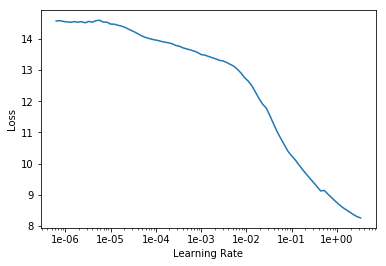

In [32]:
learn.recorder.plot()

In [34]:
learn.fit_one_cycle(5, 5e-2, wd=0.2)

epoch,train_loss,valid_loss,exp_rmspe,time
0,0.091808,0.072976,0.325030,12:39
1,4.027152,3.781367,6.899760,12:52
2,0.074674,0.116208,0.440388,14:54
3,0.043271,0.033843,0.193769,18:17
4,0.015600,0.017079,0.122301,18:31


AttributeError: 'Learner' object has no attribute 'losses'

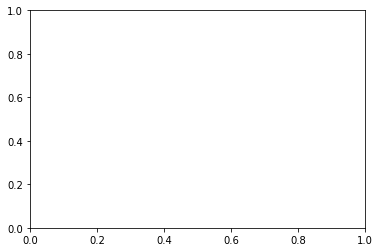

In [42]:
learn.recorder.plot_losses(skip_start=10000)

In [35]:
learn.save('1')

In [37]:
learn.load('1');

In [38]:
learn.fit_one_cycle(5, 3e-4)

epoch,train_loss,valid_loss,exp_rmspe,time
0,0.014177,0.018019,0.121081,14:01
1,0.014021,0.019463,0.117396,13:50
2,0.014032,0.014902,0.116161,14:21
3,0.010801,0.021791,0.116921,13:32
4,0.011422,0.018227,0.118739,14:20


In [39]:
learn.fit_one_cycle(5, 3e-4)

epoch,train_loss,valid_loss,exp_rmspe,time
0,0.011805,0.016292,0.114467,14:50
1,0.011398,0.016393,0.117650,14:54
2,0.010293,0.014514,0.112699,14:47
3,0.009385,0.016958,0.111048,14:33
4,0.010983,0.019695,0.112052,14:34


(10th place in the competition was 0.108)

In [40]:
test_preds=learn.get_preds(DatasetType.Test)
test_df["Sales"]=np.exp(test_preds[0].data).numpy().T[0]
test_df[["Id","Sales"]]=test_df[["Id","Sales"]].astype("int")
test_df[["Id","Sales"]].to_csv("rossmann_submission.csv",index=False)